# Identifying Skewness Numerically and Statistically

Comparing Mean and Median

If you calculate the descriptive statistics, you can often infer skewness just by comparing the mean and the median.
- **Symmetry:** The Mean $\approx$ Median.
- **Positive Skew (Right-Skewed):** The Mean > Median. The high-value outliers in the right tail pull the mean further to the right than the median.
- **Negative Skew (Left-Skewed):** The Mean < Median. The low-value outliers in the left tail pull the mean further to the left than the median.

In [119]:
import pandas as pd
import numpy as np

# Data Transformation

A **feature** is a column. Every column in the dataset, except for a few like the unique record ID, represents a feature.

Three basic kinds of transformations:
- type conversions,
- mathematical transformations, and
- extractions (Not the scope of this course!)

## 1.Type Conversion
### Description
This cell demonstrates how to remove a currency symbol from a string and convert the cleaned string to a float.

### Explanation
- `price = "$2.13"`: Defines a string variable `price` containing a price value with a dollar sign.
- `print(price)`: Prints the original `price` string.
- `intPrice = price.replace('$','')`: Creates a new string `intPrice` by removing all occurrences of the '$' character from the `price` string.
- `intPrice = float(intPrice)`: Converts the cleaned string `intPrice` into a floating-point number.
- `print(intPrice)`: Prints the converted floating-point value.

In [120]:
# Define a price string with a currency symbol
price = "$2.13"

# Print the original price
print(price)

# Remove the '$' symbol from the price string
intPrice = price.replace('$','')

# Convert the cleaned string to a float
intPrice = float(intPrice)

# Print the converted float value
print(intPrice)

$2.13
2.13


## 2.Converting String to Datetime
### Description
This cell demonstrates how to convert a string representation of a date into a pandas datetime object and extract year and month.

### Explanation
- `date = '20040428'`: Defines a string variable `date` containing a date in the format 'YYYYMMDD'.
- `date = pd.to_datetime(date, format='%Y%m%d')`: Converts the `date` string into a pandas datetime object using the specified format.
- `print(date)`: Prints the resulting pandas datetime object.
- `print(date.year)`: Prints the year component of the datetime object.
- `print(date.month)`: Prints the month component of the datetime object.

In [121]:
date = '20040428'
date = pd.to_datetime(date, format='%Y%m%d')
print(date)
print(date.year)
print(date.month)
print(date.day)
print(date.dayofweek)
print(date.hour)

2004-04-28 00:00:00
2004
4
28
2
0


In [122]:
# Create a DataFrame with a column of date strings
data = {'Date_String': ['20230115', '20230220', '20230325', '20230430']}
df_dates = pd.DataFrame(data)

print("Original DataFrame:")
print(df_dates)

# Convert the 'Date_String' column to datetime objects
df_dates['Date'] = pd.to_datetime(df_dates['Date_String'], format='%Y%m%d')

print("\nDataFrame with Datetime Column:")
print(df_dates)

# Extract year, month, and day into new columns
df_dates['Year'] = df_dates['Date'].dt.year
df_dates['Month'] = df_dates['Date'].dt.month
df_dates['Day'] = df_dates['Date'].dt.day

print("\nDataFrame with Date Components:")
print(df_dates)

Original DataFrame:
  Date_String
0    20230115
1    20230220
2    20230325
3    20230430

DataFrame with Datetime Column:
  Date_String       Date
0    20230115 2023-01-15
1    20230220 2023-02-20
2    20230325 2023-03-25
3    20230430 2023-04-30

DataFrame with Date Components:
  Date_String       Date  Year  Month  Day
0    20230115 2023-01-15  2023      1   15
1    20230220 2023-02-20  2023      2   20
2    20230325 2023-03-25  2023      3   25
3    20230430 2023-04-30  2023      4   30


# Mathematical Transformation

In [123]:
# Define DataFrames for transformation examples
import plotly.express as px

# DataFrame for logarithmic transformations (ensure all values are positive for np.log)
df_log = pd.DataFrame({'Values': [10, 13, 14, 15, 17, 18, 29, 23, 45, 25, 26, 78, 356, 786, 345, 67, 98, 462, 2, 6546, 234, 9, 3, 5, 7, 8]})

fig = px.bar(df_log)
fig.show()

# DataFrame for square root transformations (ensure all values are non-negative)
df_sqrt = pd.DataFrame({'Values': [10, 13, 14, 15, 17, 18, 29, 23, 45, 25, 26, 78, 356, 786, 345, 67, 98, 462, 2, 6546, 234, 9, 3, 5, 7, 8]})

fig = px.bar(df_sqrt)
fig.show()

## 1.Logarithmic Transformation
### Description
This cell demonstrates applying logarithmic transformations to a dataset, specifically using `np.log` and `np.log1p`.

### Explanation
- `logged = np.log(df)`: Applies the natural logarithm (`ln`) to each element in the `df` Series. This is suitable when all values are positive.
- `log1 = np.log1p(df)`: Applies the natural logarithm of (1 + x) to each element in the `df` Series. This is useful when the data might contain zero values, as `log(0)` is undefined.
- `print(df.values,"\n")`: Prints the original values of the `df` Series.
- `print(logged.values,"\n")`: Prints the values after applying `np.log`.
- `print(log1.values,"\n")`: Prints the values after applying `np.log1p`.

- Log transformation is often used when the data is highly
skewed, meaning most of the data points fall toward one
end of the distribution.
- By taking the logarithm of the values, the distribution
can be shifted toward a more symmetrical shape,
making it easier to analyze.

In [124]:
#LOG TRANSFORMATION

logged = np.log(df_log) # If all values > 0
log1 = np.log1p(df_log) #If there is 0 in values then ignore 0

fig = px.bar(log1)
fig.show()

print(logged.values,"\n")
print(log1.values,"\n")

[[2.30258509]
 [2.56494936]
 [2.63905733]
 [2.7080502 ]
 [2.83321334]
 [2.89037176]
 [3.36729583]
 [3.13549422]
 [3.80666249]
 [3.21887582]
 [3.25809654]
 [4.35670883]
 [5.87493073]
 [6.66695679]
 [5.84354442]
 [4.20469262]
 [4.58496748]
 [6.13556489]
 [0.69314718]
 [8.78660946]
 [5.45532112]
 [2.19722458]
 [1.09861229]
 [1.60943791]
 [1.94591015]
 [2.07944154]] 

[[2.39789527]
 [2.63905733]
 [2.7080502 ]
 [2.77258872]
 [2.89037176]
 [2.94443898]
 [3.40119738]
 [3.17805383]
 [3.8286414 ]
 [3.25809654]
 [3.29583687]
 [4.36944785]
 [5.87773578]
 [6.66822825]
 [5.84643878]
 [4.21950771]
 [4.59511985]
 [6.13772705]
 [1.09861229]
 [8.78676221]
 [5.45958551]
 [2.30258509]
 [1.38629436]
 [1.79175947]
 [2.07944154]
 [2.19722458]] 



## 2.Square Root Transformation
### Description
This cell demonstrates applying a square root transformation to a dataset.

### Explanation
- `data_sqrt = np.sqrt(df)`: Applies the square root function to each element in the `df` Series.
- `print(df.values,"\n")`: Prints the original values of the `df` Series.
- `#print(data_sqrt.values,"\n")`: This line is commented out, but it would print the values after applying the square root transformation if uncommented.

- Similar to log transformation, square root
transformation is often used to address issues with
skewness and make the data more normally
distributed.
- Square root transformation is also useful when the
data contains values close to zero, as taking the square
root of these values can bring them closer to the rest
of the data and reduce the impact of extreme values.

In [125]:
#SQRT Transformation

data_sqrt = np.sqrt(df_sqrt)

fig = px.bar(data_sqrt)
fig.show()

print(data_sqrt.values,"\n")

[[ 3.16227766]
 [ 3.60555128]
 [ 3.74165739]
 [ 3.87298335]
 [ 4.12310563]
 [ 4.24264069]
 [ 5.38516481]
 [ 4.79583152]
 [ 6.70820393]
 [ 5.        ]
 [ 5.09901951]
 [ 8.83176087]
 [18.86796226]
 [28.03569154]
 [18.57417562]
 [ 8.18535277]
 [ 9.89949494]
 [21.49418526]
 [ 1.41421356]
 [80.90735442]
 [15.29705854]
 [ 3.        ]
 [ 1.73205081]
 [ 2.23606798]
 [ 2.64575131]
 [ 2.82842712]] 



# Data Normalization

The process of transforming features in a dataset to a common scale, without distorting differences in the ranges of values.

This is important when your data has varying scales or units, as some machine learning algorithms are sensitive to the magnitude of the data, such as distance-based models (e.g., k-NN, SVM) and gradient-based algorithms (e.g., gradient descent).

## 1.Min-Max Scaling (Feature Scaling)
### Description
Min-Max normalization transforms the features to a fixed range, **usually [0, 1]**, by scaling the data based on the minimum and maximum values in the dataset.

### Explanation
- `data = [...]`: Defines a Python list named `data` containing numerical values.
- `min_val = min(data)`: Finds the minimum value in the `data` list.
- `max_val = max(data)`: Finds the maximum value in the `data` list.
- `normalized = []`: Initializes an empty list to store the normalized values.
- `for x in data:`: Iterates through each value `x` in the `data` list.
- `norm_value = (x - min_val) / (max_val - min_val)`: Applies the Min-Max normalization formula to calculate the normalized value.
- `normalized.append(norm_value)`: Appends the calculated normalized value to the `normalized` list.
- `print("Original Data:", data)`: Prints the original `data` list.
- `print("Normalized Data:", normalized)`: Prints the list of normalized values.

In [126]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Step 1: Find min and max
min_val = min(data)
max_val = max(data)

# Step 2: Apply Min-Max Normalization manually
normalized = []
for x in data:
    norm_value = (x - min_val) / (max_val - min_val)
    normalized.append(norm_value)

print("Original Data:", data)
print("Normalized Data:", normalized)


Original Data: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Normalized Data: [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0]


In [127]:
# Min-Max Scaling Manual Implementation on DataFrame

import pandas as pd

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [100, 200, 150, 250, 300]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Apply Min-Max Normalization manually to the DataFrame
df_min_max = df.copy()
for column in df_min_max.columns:
    min_val = df_min_max[column].min()
    max_val = df_min_max[column].max()
    df_min_max[column] = (df_min_max[column] - min_val) / (max_val - min_val)

print("\nNormalized DataFrame (Min-Max Scaling):")
print(df_min_max)

Original DataFrame:
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300

Normalized DataFrame (Min-Max Scaling):
   Feature1  Feature2
0      0.00      0.00
1      0.25      0.50
2      0.50      0.25
3      0.75      0.75
4      1.00      1.00


In [128]:
# Min-Max Scaling using scikit-learn

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [100, 200, 150, 250, 300]}
df_minmax_skl = pd.DataFrame(data)

print("Original DataFrame for Min-Max Scaling (scikit-learn):")
print(df_minmax_skl)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_minmax_scaled_skl = scaler.fit_transform(df_minmax_skl)

# Convert the scaled array back to a DataFrame
df_minmax_scaled_skl = pd.DataFrame(df_minmax_scaled_skl, columns=df_minmax_skl.columns)

print("\nNormalized DataFrame (Min-Max Scaling - scikit-learn):")
print(df_minmax_scaled_skl)

Original DataFrame for Min-Max Scaling (scikit-learn):
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300

Normalized DataFrame (Min-Max Scaling - scikit-learn):
   Feature1  Feature2
0      0.00      0.00
1      0.25      0.50
2      0.50      0.25
3      0.75      0.75
4      1.00      1.00


## 2.Min-Max Normalization with Custom Range

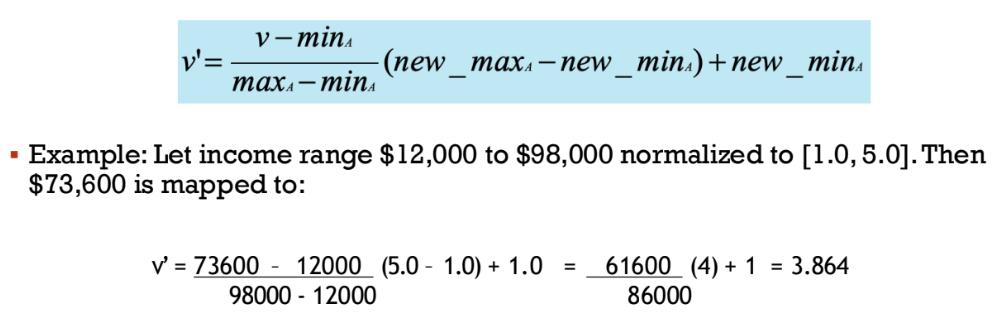

In [129]:
# Apply Min-Max Normalization with custom range

df_min_max = df.copy()
new_min = 1
new_max = 5

for column in df_min_max.columns.tolist():
    min_val = df_min_max[column].min()
    max_val = df_min_max[column].max()
    df_min_max[column] = ((df_min_max[column] - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min

print("\nNormalized DataFrame with custom range:")
print(df_min_max)


Normalized DataFrame with custom range:
   Feature1  Feature2
0       1.0       1.0
1       2.0       3.0
2       3.0       2.0
3       4.0       4.0
4       5.0       5.0


## 3.Z-Score Normalization (Standardization)
### Description
Z-score normalization (or Standardization) transforms the data to have a **mean of 0** and a **standard deviation of 1**.

- Data values that lie below mean will have a negative z-score standardization.
- Data values falling exactly on the mean will have a zero z-score standardization.
- Data values that lie above the mean will have a positive z-score standardization.

Z-score methods states that a data value is an outlier if it has a Z-score that is **either less than -3 or greater than 3**.

### Explanation
- `nums = [...]`: Defines a Python list named `nums` containing numerical values.
- `nums = pd.Series(nums)`: Converts the Python list `nums` into a pandas Series.
- `mean = nums.mean()`: Calculates the mean (average) of the values in the `nums` Series.
- `std = nums.std()`: Calculates the standard deviation of the values in the `nums` Series.
- `zScores = []`: Initializes an empty list to store the Z-Scores.
- `for x in nums:`: Iterates through each value `x` in the `nums` Series.
- `val = (x - mean)/std`: Calculates the Z-Score for the current value using the formula.
- `zScores.append(val)`: Appends the calculated Z-Score to the `zScores` list.
- `zScores = pd.Series(zScores)`: Converts the list of Z-Scores into a pandas Series.
- `zScores.values`: Displays the values of the Z-Scores Series.

In [130]:
#Z-SCORE NORM

nums = [10, 13, 14, 15, 17, 18, 29, 23, 45, 25, 26, 78, 67, 98, 2, 9, 3, 5, 7, 8]
nums = pd.Series(nums)

# Zscore = (X - mean)/std

mean = nums.mean()
std = nums.std()

zScores = (nums - mean) / std
print(zScores)
print()
print(zScores.mean())
print(zScores.std())

0    -0.589607
1    -0.476221
2    -0.438426
3    -0.400630
4    -0.325040
5    -0.287244
6     0.128504
7    -0.098268
8     0.733229
9    -0.022677
10    0.015118
11    1.980474
12    1.564726
13    2.736380
14   -0.891969
15   -0.627402
16   -0.854174
17   -0.778583
18   -0.702993
19   -0.665197
dtype: float64

-1.1102230246251566e-17
1.0


In [131]:
# Z-Score Normalization Manual Implementation on DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50, 5000, 15000],
        'Feature2': [100, 200, 150, 250, 300, 20000, 24000]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Apply Z-Score Normalization manually to the DataFrame
df_z_score = df.copy()
for column in df_z_score.columns:
    mean = df_z_score[column].mean()
    std = df_z_score[column].std()
    df_z_score[column] = (df_z_score[column] - mean) / std

print("\nNormalized DataFrame (Manual Z-Score Normalization):")
print(df_z_score)
print()
print(df_z_score.mean())
print(df_z_score.std())

Original DataFrame:
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300
5      5000     20000
6     15000     24000

Normalized DataFrame (Manual Z-Score Normalization):
   Feature1  Feature2
0 -0.507094 -0.591456
1 -0.505326 -0.582110
2 -0.503558 -0.586783
3 -0.501790 -0.577437
4 -0.500023 -0.572764
5  0.375017  1.268358
6  2.142773  1.642190

Feature1    6.344132e-17
Feature2    0.000000e+00
dtype: float64
Feature1    1.0
Feature2    1.0
dtype: float64


In [132]:
# Z-Score Normalization using scikit-learn

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50, 5000, 15000],
        'Feature2': [100, 200, 150, 250, 300, 20000, 24000]}
df_zscore_skl = pd.DataFrame(data)

print("Original DataFrame for Z-Score Normalization (scikit-learn):")
print(df_zscore_skl)

# Apply Z-Score Normalization
scaler = StandardScaler()
df_zscore_scaled_skl = scaler.fit_transform(df_zscore_skl)

# Convert the scaled array back to a DataFrame
df_zscore_scaled_skl = pd.DataFrame(df_zscore_scaled_skl, columns=df_zscore_skl.columns)

print("\nNormalized DataFrame (Z-Score Normalization - scikit-learn):")
print(df_zscore_scaled_skl)

print("\nMean of scaled data:")
print(df_zscore_scaled_skl.mean())
print("\nStandard deviation of scaled data:")
print(df_zscore_scaled_skl.std())

Original DataFrame for Z-Score Normalization (scikit-learn):
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300
5      5000     20000
6     15000     24000

Normalized DataFrame (Z-Score Normalization - scikit-learn):
   Feature1  Feature2
0 -0.547724 -0.638845
1 -0.545814 -0.628750
2 -0.543905 -0.633798
3 -0.541995 -0.623703
4 -0.540086 -0.618656
5  0.405065  1.369984
6  2.314460  1.773768

Mean of scaled data:
Feature1    0.0
Feature2    0.0
dtype: float64

Standard deviation of scaled data:
Feature1    1.080123
Feature2    1.080123
dtype: float64


## 4.Robust Scaling

It scales the data by using the median and the interquartile range (IQR) instead of the mean and standard deviation, making it robust to outliers.

This method is especially useful when your dataset has many outliers.

Robust Scaling is highly recommended when dealing with features that have outliers or are highly skewed (like the Revenue and Viewership columns in your assignment).

- **Robust to Outliers:** It uses the median and IQR, which are unaffected by extreme values, to perform the scaling.

- **Standard Scaling (Z-score)** uses the mean and standard deviation, both of which are heavily influenced by outliers, making the scaling itself unreliable if outliers are present.

**1.Zero Value (0)**
- Interpretation: The original data point was exactly equal to the median of the feature.
- Reasoning: If $x = \text{Median}(X)$, the numerator becomes $x - x = 0$.

**2.Negative Value (< 0)**
- Interpretation: The original data point was below the median of the feature.
- Reasoning: If $x < \text{Median}(X)$, the numerator becomes a negative number.

**3.Positive Value (> 0)**
- Interpretation: The original data point was above the median of the feature.
- Reasoning: If $x > \text{Median}(X)$, the numerator becomes a positive number.

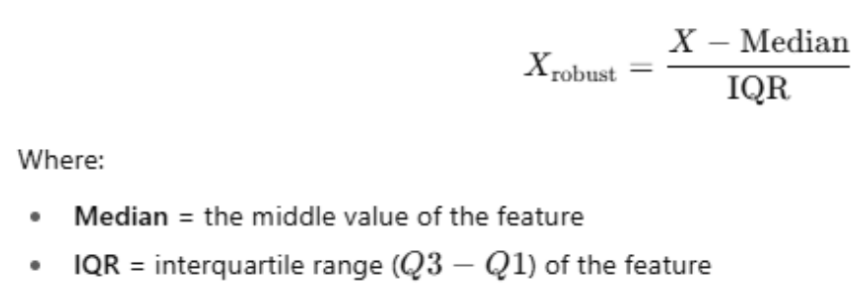

In [133]:
# Robust Scaling Manual Implementation on DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50, 5000, 15000],
        'Feature2': [100, 200, 150, 250, 300, 20000, 24000]}
df_robust_manual = pd.DataFrame(data)

print("Original DataFrame for Robust Scaling (Manual):")
print(df_robust_manual)

# Apply Robust Scaling manually to the DataFrame
df_robust_manual_scaled = df_robust_manual.copy()

for column in df_robust_manual_scaled.columns:
    median = df_robust_manual_scaled[column].median()
    Q1 = df_robust_manual_scaled[column].quantile(0.25)
    Q3 = df_robust_manual_scaled[column].quantile(0.75)
    IQR = Q3 - Q1

    # Handle the case where IQR is zero to avoid division by zero
    if IQR != 0:
        df_robust_manual_scaled[column] = (df_robust_manual_scaled[column] - median) / IQR
    else:
        df_robust_manual_scaled[column] = df_robust_manual_scaled[column] - median # Just center around the median if IQR is 0


print("\nNormalized DataFrame (Manual Robust Scaling):")
print(df_robust_manual_scaled)

Original DataFrame for Robust Scaling (Manual):
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300
5      5000     20000
6     15000     24000

Normalized DataFrame (Manual Robust Scaling):
   Feature1  Feature2
0    -0.012 -0.015038
1    -0.008 -0.005013
2    -0.004 -0.010025
3     0.000  0.000000
4     0.004  0.005013
5     1.984  1.979950
6     5.984  2.380952


In [134]:
# Robust Scaling using scikit-learn

from sklearn.preprocessing import RobustScaler
import pandas as pd

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50, 5000, 15000],
        'Feature2': [100, 200, 150, 250, 300, 20000, 24000]}
df_robust_skl = pd.DataFrame(data)

print("Original DataFrame for Robust Scaling (scikit-learn):")
print(df_robust_skl)

# Apply Robust Scaling
scaler = RobustScaler()
df_robust_scaled_skl = scaler.fit_transform(df_robust_skl)

# Convert the scaled array back to a DataFrame
df_robust_scaled_skl = pd.DataFrame(df_robust_scaled_skl, columns=df_robust_skl.columns)

print("\nNormalized DataFrame (Robust Scaling - scikit-learn):")
print(df_robust_scaled_skl)

Original DataFrame for Robust Scaling (scikit-learn):
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300
5      5000     20000
6     15000     24000

Normalized DataFrame (Robust Scaling - scikit-learn):
   Feature1  Feature2
0    -0.012 -0.015038
1    -0.008 -0.005013
2    -0.004 -0.010025
3     0.000  0.000000
4     0.004  0.005013
5     1.984  1.979950
6     5.984  2.380952


## 5.Unit Vector Scaling

Unit vector scaling (also known as Vector Normalization) transforms the data such that the magnitude (or Euclidean norm) of each data point becomes 1.
- This is useful when you want to normalize a dataset for certain distance-based
models, like k-NN or when features/columns have different units of measurement.

When looking at Unit Vector scaled values, a negative number simply means the original value was negative, and a positive number means the original value was positive.

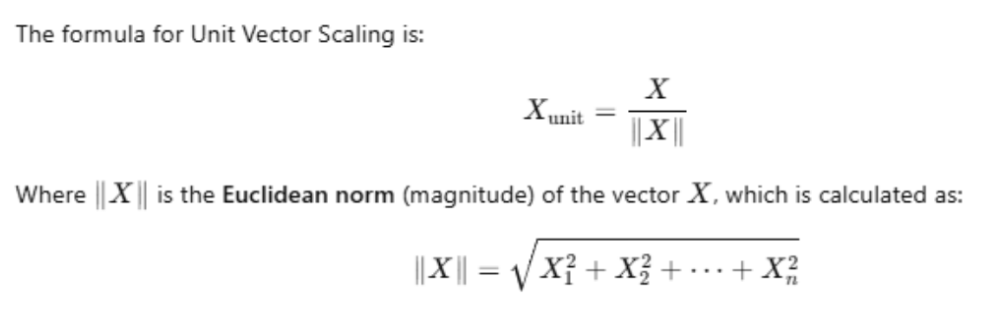

In [135]:
# Unit Vector Scaling using scikit-learn
from sklearn.preprocessing import Normalizer
import pandas as pd

# Sample DataFrame
data = {'Feature1': [10, 20, 30, 40, 50, 6000, 8000],
        'Feature2': [100, 200, 150, 250, 300, 15000, 25000]}
df_unit_vector_skl = pd.DataFrame(data)

print("Original DataFrame for Unit Vector Scaling (scikit-learn - Column-wise):")
print(df_unit_vector_skl)

# Create a Normalizer object (default is L2 norm, which is Unit Vector Scaling)
scaler = Normalizer()

# Apply Unit Vector Scaling
df_unit_vector_scaled = scaler.fit_transform(df_unit_vector_skl)

# Convert the scaled array back to a DataFrame
df_unit_vector_scaled = pd.DataFrame(df_unit_vector_scaled, columns=df_unit_vector_skl.columns)

print("\nNormalized DataFrame (Unit Vector Scaling - scikit-learn:")
print(df_unit_vector_scaled)

Original DataFrame for Unit Vector Scaling (scikit-learn - Column-wise):
   Feature1  Feature2
0        10       100
1        20       200
2        30       150
3        40       250
4        50       300
5      6000     15000
6      8000     25000

Normalized DataFrame (Unit Vector Scaling - scikit-learn:
   Feature1  Feature2
0  0.099504  0.995037
1  0.099504  0.995037
2  0.196116  0.980581
3  0.157991  0.987441
4  0.164399  0.986394
5  0.371391  0.928477
6  0.304776  0.952424


# EDA: Descriptive Analysis

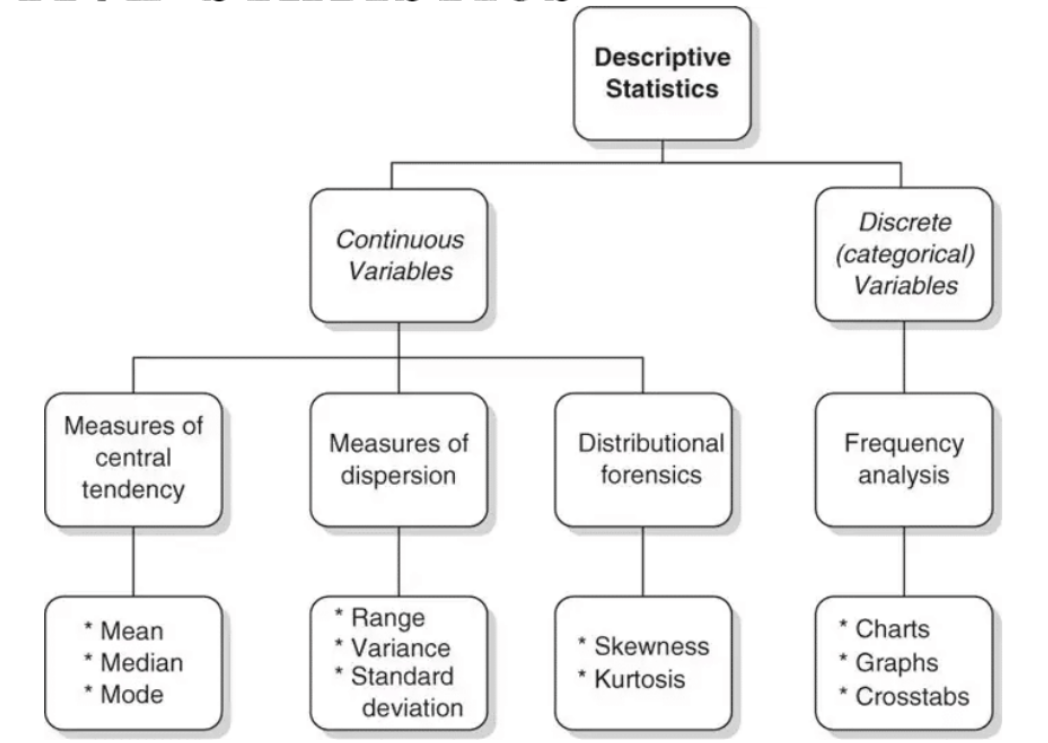

## Frequencies & Mode

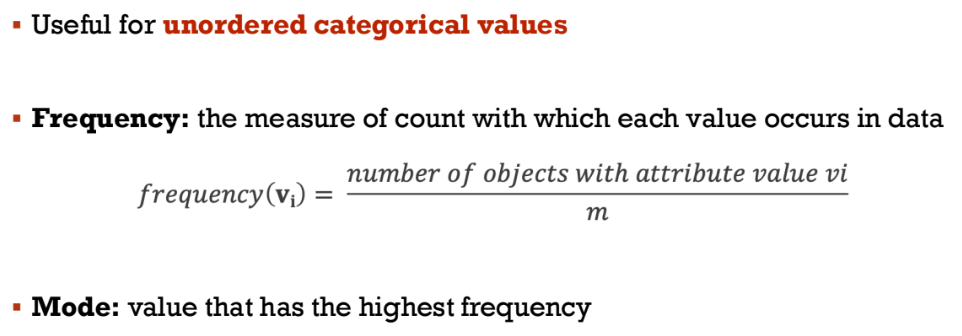

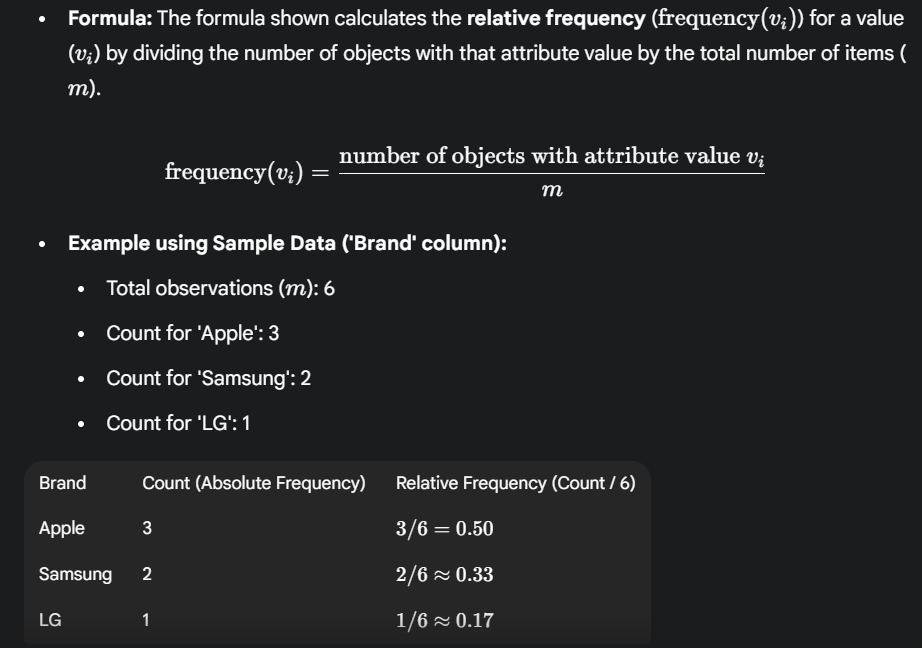

## Percentiles

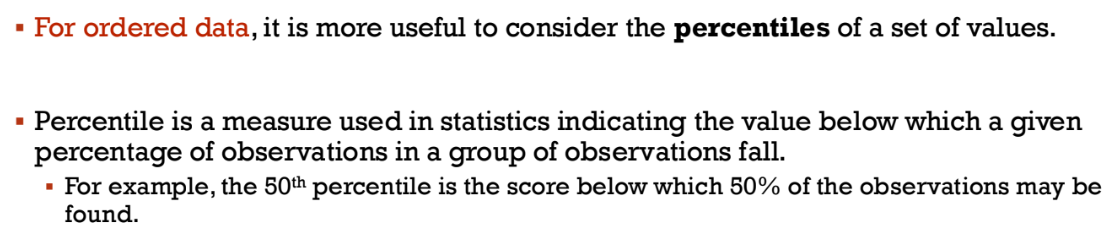

## Measure of Central Tendency

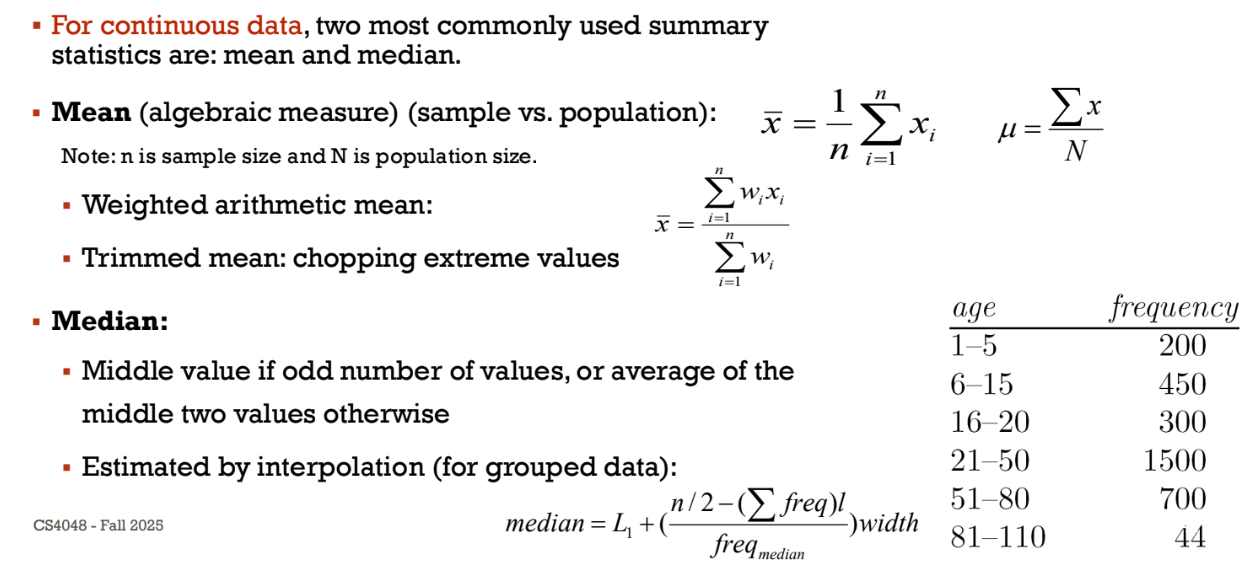

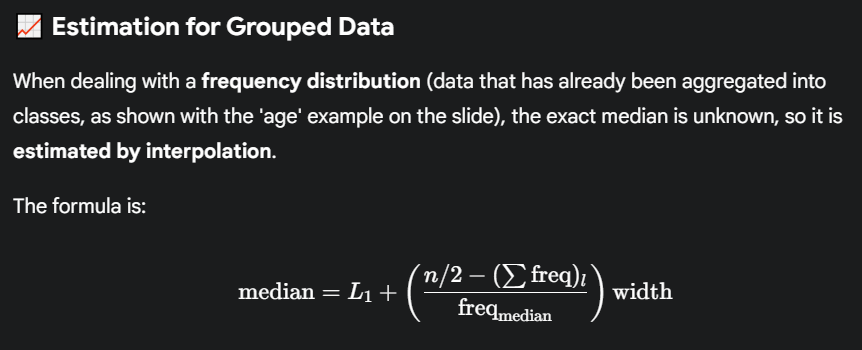

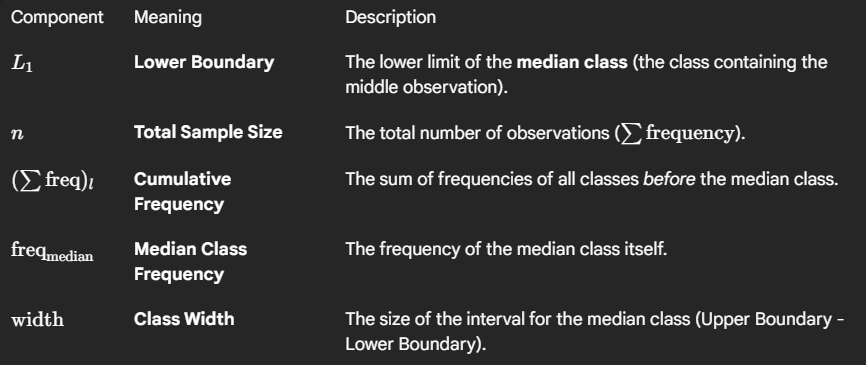

This formula mathematically interpolates where the **n/2** observation falls within the median class interval, providing the best estimate for the median value when the original raw data is unavailable.

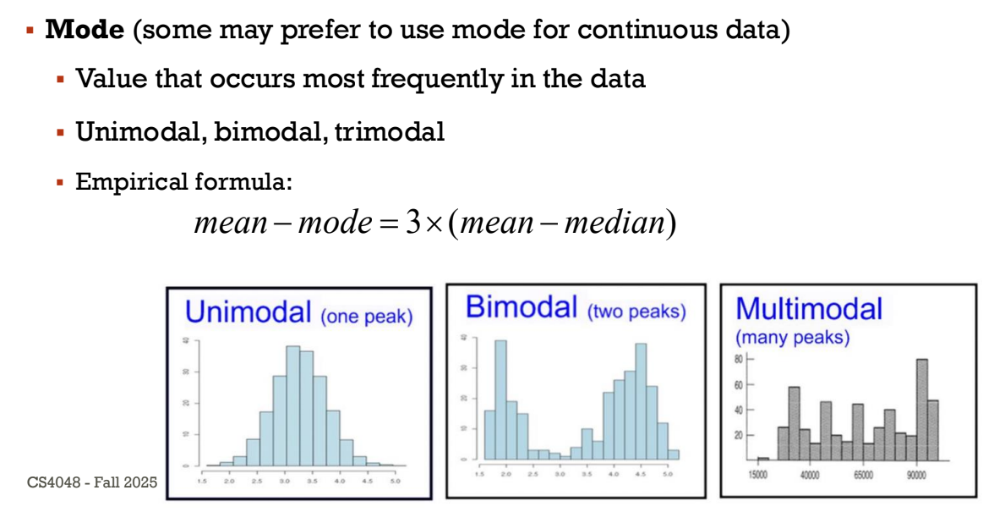

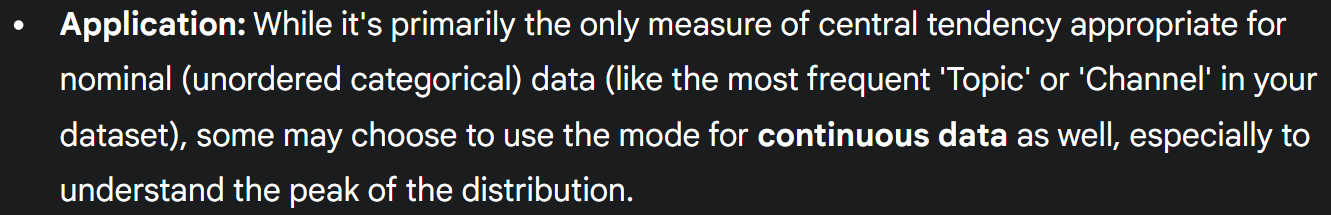

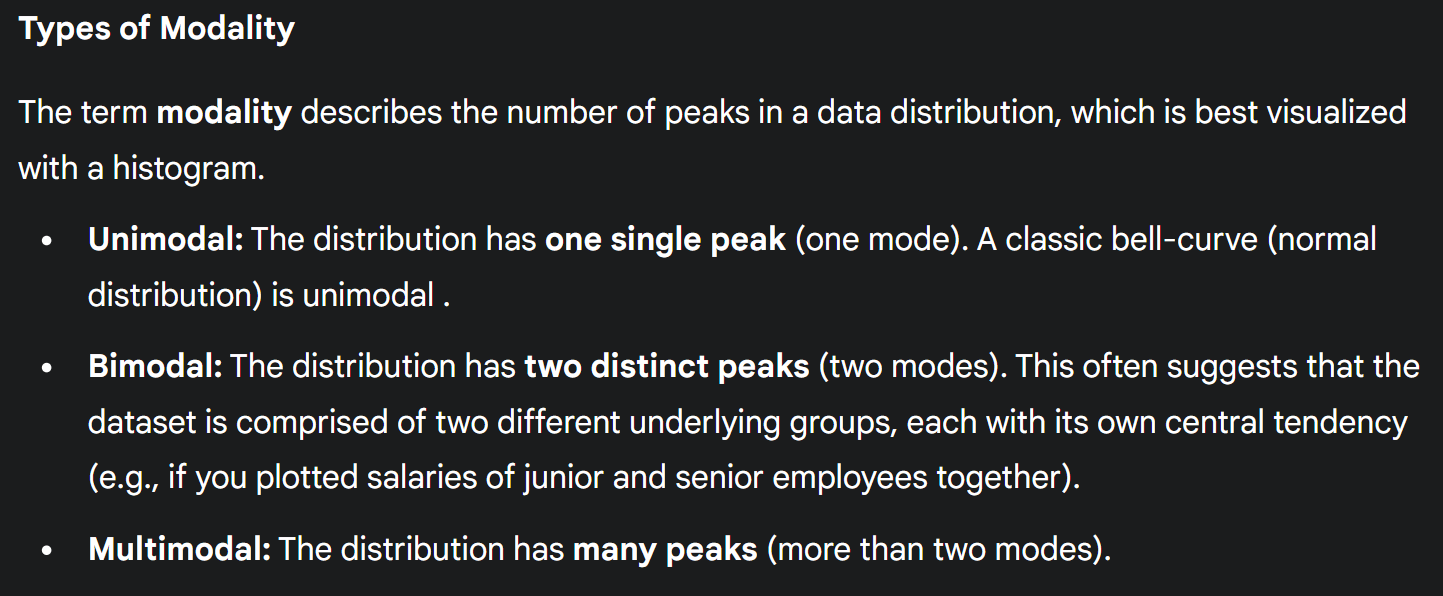

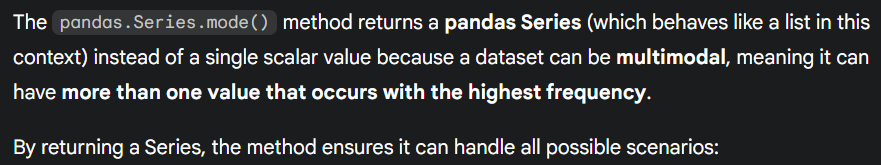

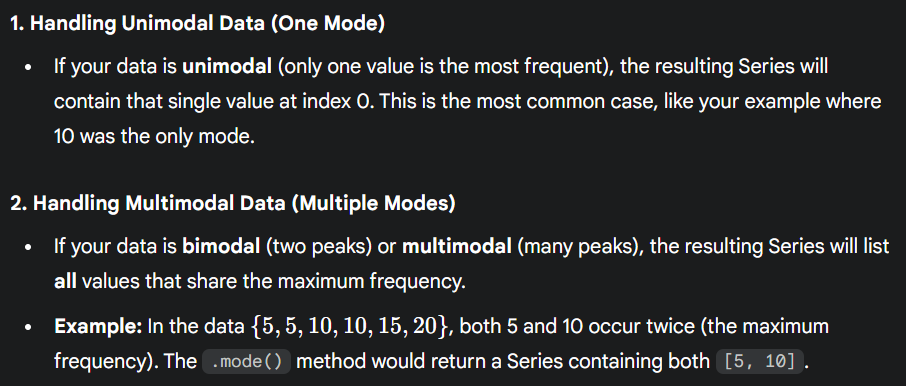

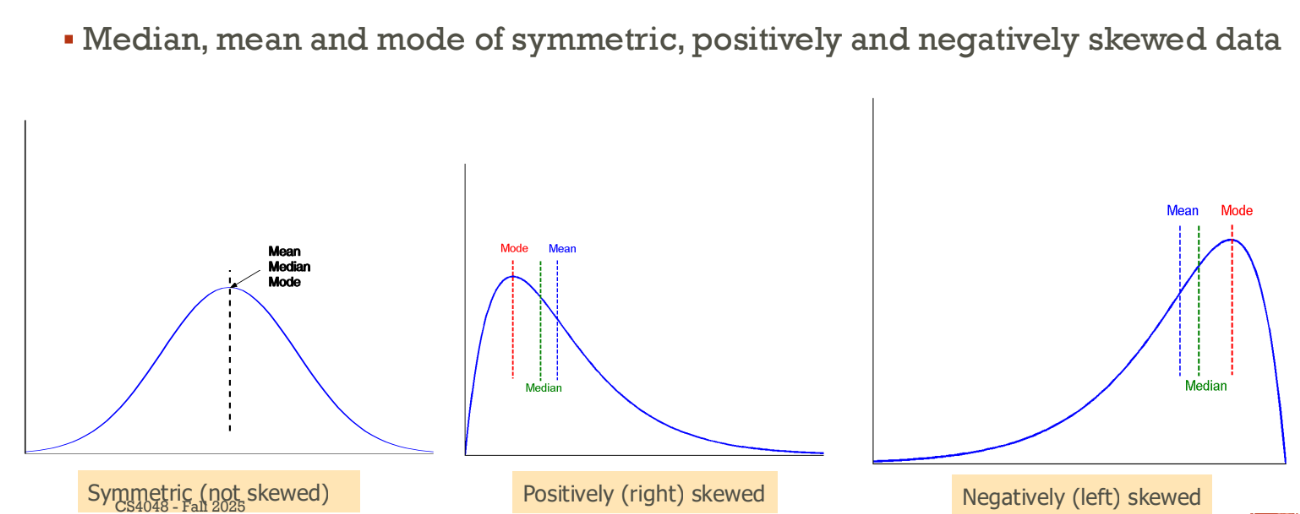

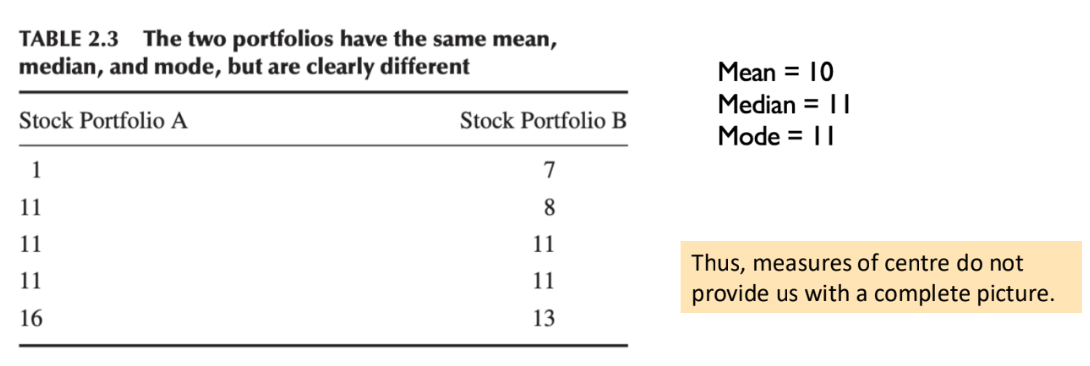

## Measure of Dispersion/Spread/Variability

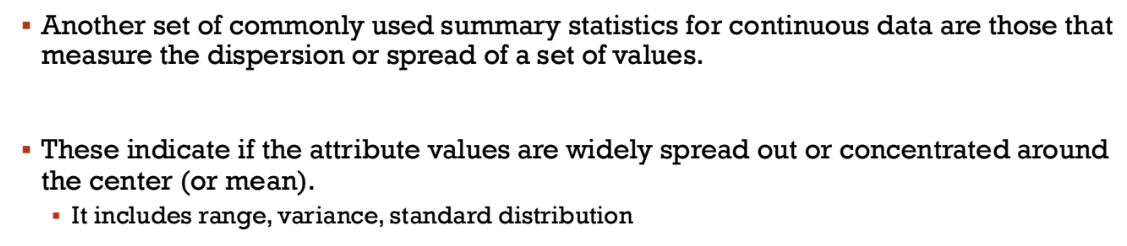

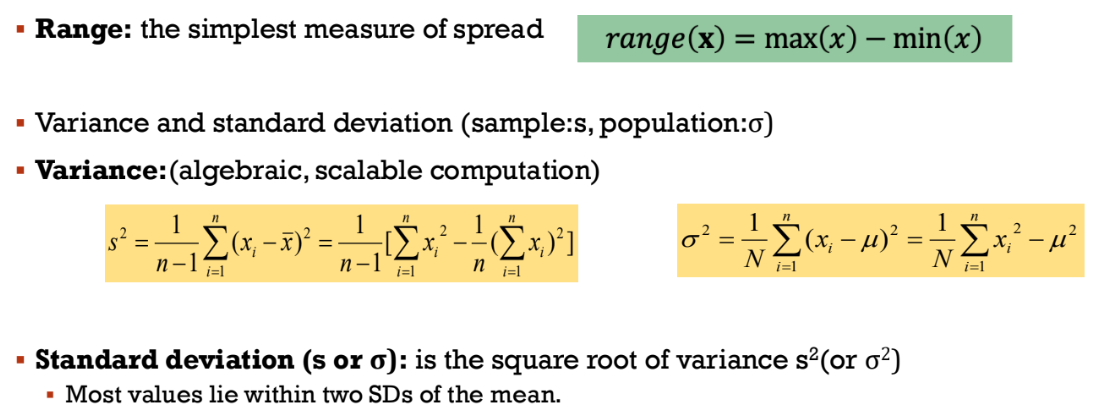

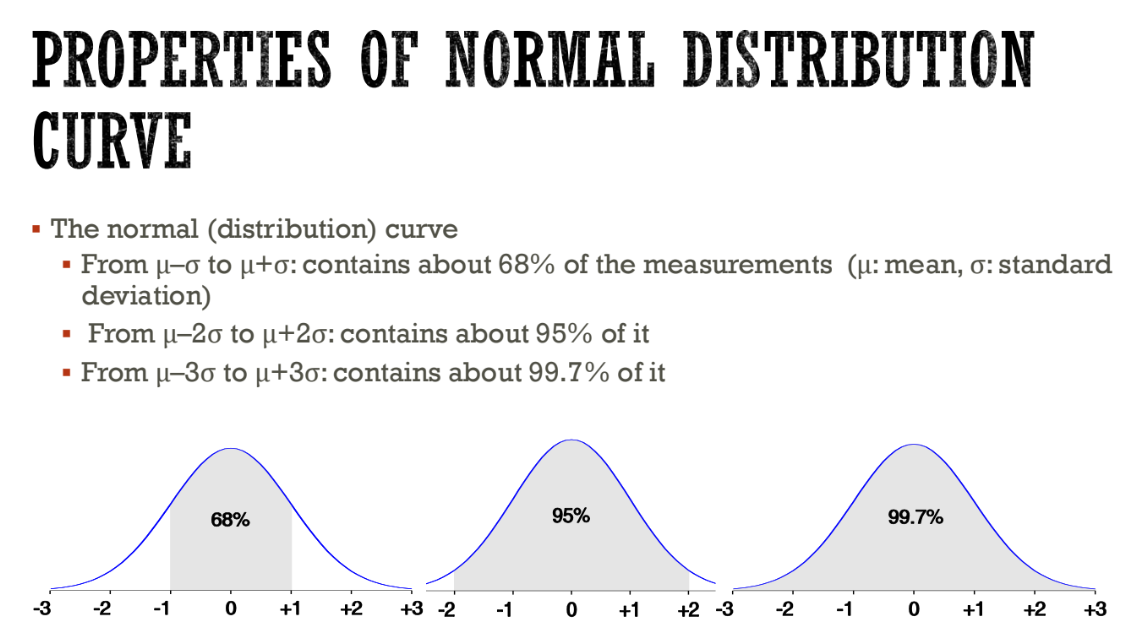

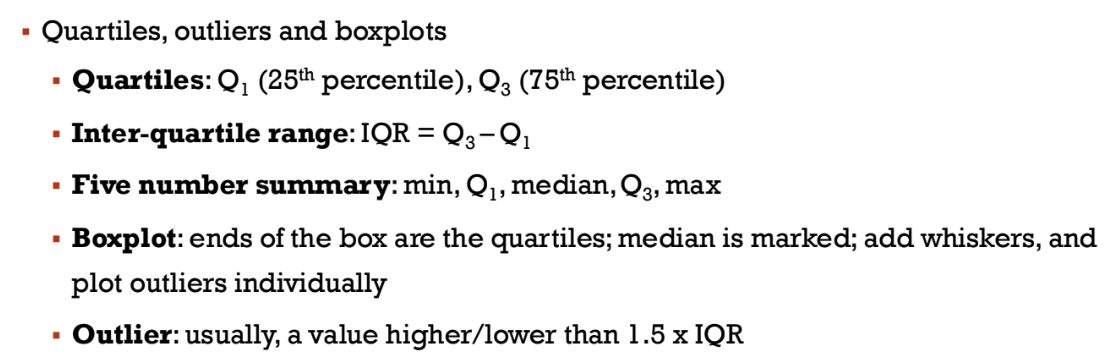

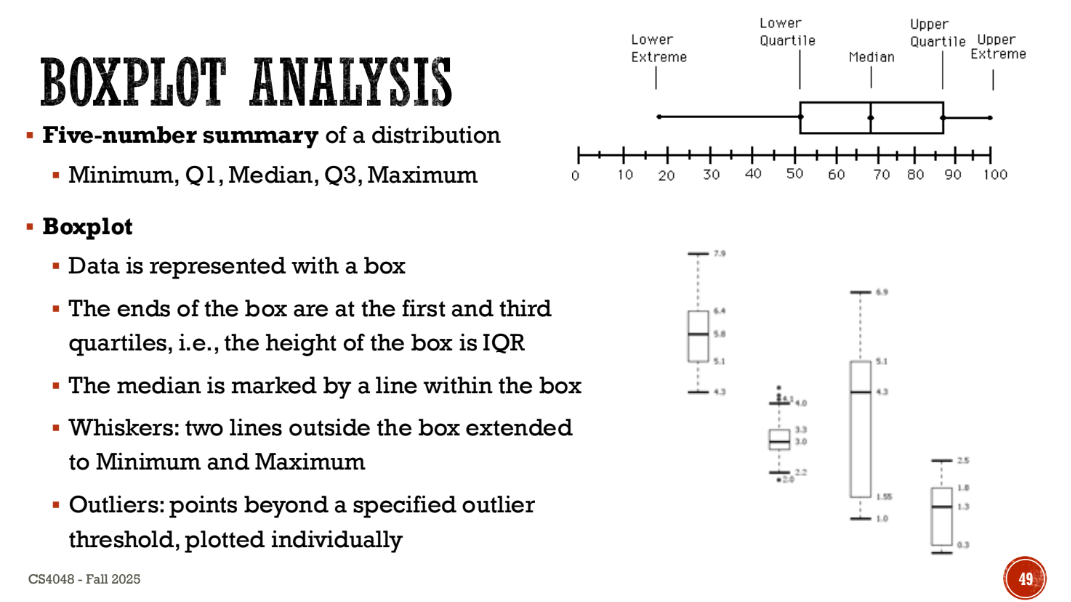

## Multivariate Summary Statistics

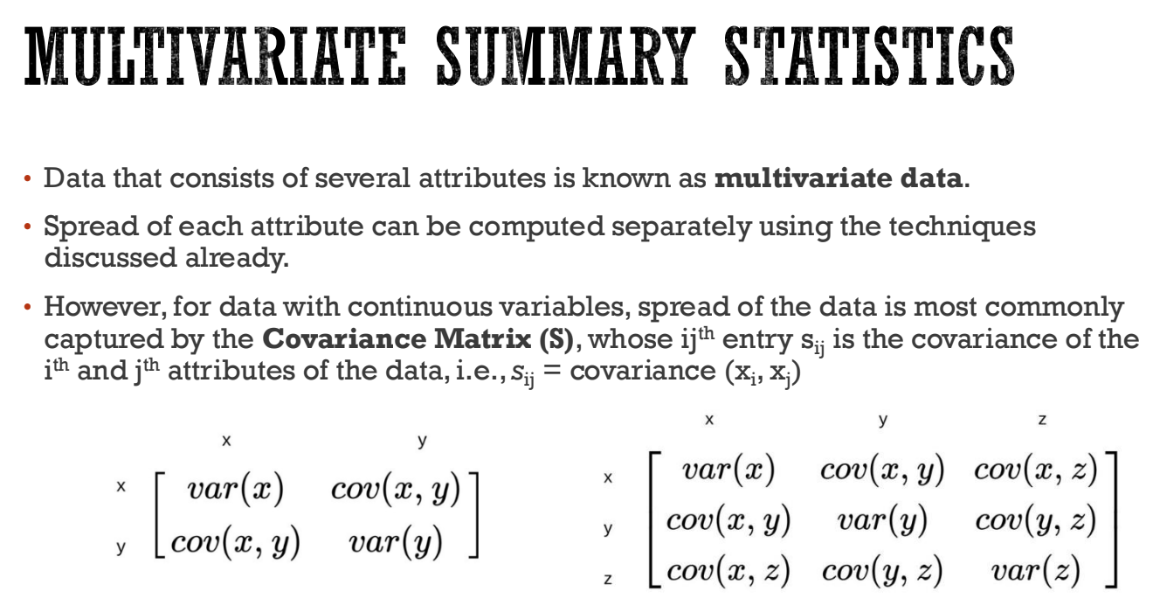

# Code Examples for EDA: Descriptive Analysis

In [136]:
import pandas as pd
import numpy as np

# Sample DataFrame for EDA examples
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'B', 'C', 'A'],
        'Numerical1': [10, 12, 10, 15, 12, 10, 11, 12, 15, 10],
        'Numerical2': [100, 120, 105, 150, 125, 110, 115, 130, 160, 112]}
df_eda = pd.DataFrame(data)

print("Sample DataFrame for EDA:")
display(df_eda)

Sample DataFrame for EDA:


,Category,Numerical1,Numerical2
0,A,10,100
1,B,12,120
2,A,10,105
3,C,15,150
4,B,12,125
5,A,10,110
6,A,11,115
7,B,12,130
8,C,15,160
9,A,10,112


## Frequencies & Mode

In [137]:
# Frequencies of a categorical column
print("\nFrequencies of 'Category':")
display(df_eda['Category'].value_counts())

# Mode of a categorical column
print("\nMode of 'Category':")
display(df_eda['Category'].mode())

# Mode of a numerical column
print("\nMode of 'Numerical1':")
display(df_eda['Numerical1'].mode())


Frequencies of 'Category':


,count
Category,
A,5
B,3
C,2



Mode of 'Category':


,Category
0,A



Mode of 'Numerical1':


,Numerical1
0,10


## Percentiles

In [138]:
# Percentiles of 'Numerical1'
print("\n25th percentile of 'Numerical1':", df_eda['Numerical1'].quantile(0.25))
print("50th percentile (Median) of 'Numerical1':", df_eda['Numerical1'].quantile(0.50))
print("75th percentile of 'Numerical1':", df_eda['Numerical1'].quantile(0.75))

# Custom percentiles
print("\nCustom percentiles (10th, 90th) of 'Numerical2':")
display(df_eda['Numerical2'].quantile([0.1, 0.9]))


25th percentile of 'Numerical1': 10.0
50th percentile (Median) of 'Numerical1': 11.5
75th percentile of 'Numerical1': 12.0

Custom percentiles (10th, 90th) of 'Numerical2':


,Numerical2
0.1,104.5
0.9,151.0


## Measure of Central Tendency (Mean, Median, Mode)

In [139]:
# Mean
print("\nMean of 'Numerical1':", df_eda['Numerical1'].mean())
print("Mean of 'Numerical2':", df_eda['Numerical2'].mean())

# Median
print("\nMedian of 'Numerical1':", df_eda['Numerical1'].median())
print("Median of 'Numerical2':", df_eda['Numerical2'].median())


Mean of 'Numerical1': 11.7
Mean of 'Numerical2': 122.7

Median of 'Numerical1': 11.5
Median of 'Numerical2': 117.5


**Interpolation**

In [140]:
import pandas as pd
import numpy as np

# Data from the frequency table (Assuming discrete age groups)
age_groups = ['1-5', '6-15', '16-20', '21-50', '51-80', '81-110']
frequencies = [200, 450, 300, 1500, 700, 44]

# Create a DataFrame for easier calculation
data = pd.DataFrame({
    'age_group': age_groups,
    'frequency': frequencies
})

# Calculate cumulative frequency and total observations (n)
data['cumulative_frequency'] = data['frequency'].cumsum()
n = data['frequency'].sum()  # Total number of observations
n_half = n / 2  # The position of the median (n/2)

display(data)

,age_group,frequency,cumulative_frequency
0,1-5,200,200
1,6-15,450,650
2,16-20,300,950
3,21-50,1500,2450
4,51-80,700,3150
5,81-110,44,3194


In [141]:
# The median position is n/2
median_position = n_half
print(f"Total Observations (n): {n}")
print(f"Median Position (n/2): {median_position}\n")

# Find the median class (where cumulative frequency first exceeds n/2)
median_class_row = data[data['cumulative_frequency'] >= median_position].iloc[0]
display(median_class_row)

# --- Extract values needed for the formula ---
# The median class is '21-50' (since cumulative frequency goes from 950 to 2450)
print(f"\nMedian Class: {median_class_row['age_group']}")

Total Observations (n): 3194
Median Position (n/2): 1597.0



,3
age_group,21-50
frequency,1500
cumulative_frequency,2450



Median Class: 21-50


In [142]:
# L1: Lower boundary of the median class. The class before is 16-20, so L1 is 20.5 (midpoint between 20 and 21)
L1 = 20.5
# freq_median: Frequency of the median class
freq_median = median_class_row['frequency']

# sum_freq_l: Cumulative frequency of the class *before* the median class
sum_freq_l = data[data['cumulative_frequency'] < median_position]['cumulative_frequency'].iloc[-1]

# width: Class width of the median class (50 - 21 + 1) = 30. Using (50.5 - 20.5) = 30 for boundaries.
width = 50.5 - L1 # Upper boundary (50.5) - Lower boundary (20.5) = 30

# Calculate the estimated median
median_estimated = L1 + ((n_half - sum_freq_l) / freq_median) * width

print(f"\n--- Median Interpolation Calculations ---")
print(f"L1 (Lower Boundary): {L1}")
print(f"Sum Freq (l): {sum_freq_l}")
print(f"Freq (median): {freq_median}")
print(f"Width: {width}")
print(f"\nEstimated Median Age: {median_estimated:.2f} years")


--- Median Interpolation Calculations ---
L1 (Lower Boundary): 20.5
Sum Freq (l): 950
Freq (median): 1500
Width: 30.0

Estimated Median Age: 33.44 years


**Mode**

In [143]:
# Mode (already shown in Frequencies & Mode section, but included here for completeness)
print("\nMode of 'Numerical1':")
display(df_eda['Numerical1'].mode())
print("\nMode of 'Numerical2':")
display(df_eda['Numerical2'].mode())


Mode of 'Numerical1':


,Numerical1
0,10



Mode of 'Numerical2':


,Numerical2
0,100
1,105
2,110
3,112
4,115
5,120
6,125
7,130
8,150
9,160


In [144]:
import pandas as pd
import numpy as np

# 1. Create a simulated, positively skewed dataset (e.g., Viewership/Revenue)
# This data has a large cluster of low values and a few high outliers.
data = pd.Series(
    [10, 10, 10, 12, 14, 15, 16, 20, 25, 100, 150]
)

# 2. Calculate the required statistics
data_mean = data.mean()
data_median = data.median()
# The mode is the value that appears most often (10, in this case)
# .mode() returns a Series, so we take the first element [0]
data_mode_actual = data.mode()[0]

# 3. Apply the Empirical Formula
# Mean - Mode_Estimate = 3 * (Mean - Median)
# Mode_Estimate = Mean - 3 * (Mean - Median)
mode_estimated = data_mean - 3 * (data_mean - data_median)

# 4. Output Results
print(f"Data Set: {data.values}\n")
print(f"Calculated Mean:   {data_mean:.2f}")
print(f"Calculated Median: {data_median:.2f}")
print(f"Calculated Mode (Actual): {data_mode_actual:.2f}")

print("\n--- Empirical Formula Result ---")
print(f"Estimated Mode: {mode_estimated:.2f}")
print(f"Difference (Actual - Estimated): {(data_mode_actual - mode_estimated):.2f}")

Data Set: [ 10  10  10  12  14  15  16  20  25 100 150]

Calculated Mean:   34.73
Calculated Median: 15.00
Calculated Mode (Actual): 10.00

--- Empirical Formula Result ---
Estimated Mode: -24.45
Difference (Actual - Estimated): 34.45


## Measure of Dispersion/Spread/Variability (Range, Variance, Standard Deviation, IQR)

In [145]:
# Range
range_numerical1 = df_eda['Numerical1'].max() - df_eda['Numerical1'].min()
range_numerical2 = df_eda['Numerical2'].max() - df_eda['Numerical2'].min()
print("\nRange of 'Numerical1':", range_numerical1)
print("Range of 'Numerical2':", range_numerical2)

# Variance
print("\nVariance of 'Numerical1':", df_eda['Numerical1'].var())
print("Variance of 'Numerical2':", df_eda['Numerical2'].var())

# Standard Deviation
print("\nStandard Deviation of 'Numerical1':", df_eda['Numerical1'].std())
print("Standard Deviation of 'Numerical2':", df_eda['Numerical2'].std())

# Interquartile Range (IQR)
Q1_num1 = df_eda['Numerical1'].quantile(0.25)
Q3_num1 = df_eda['Numerical1'].quantile(0.75)
IQR_num1 = Q3_num1 - Q1_num1
print("\nIQR of 'Numerical1':", IQR_num1)

Q1_num2 = df_eda['Numerical2'].quantile(0.25)
Q3_num2 = df_eda['Numerical2'].quantile(0.75)
IQR_num2 = Q3_num2 - Q1_num2
print("IQR of 'Numerical2':", IQR_num2)


Range of 'Numerical1': 5
Range of 'Numerical2': 60

Variance of 'Numerical1': 3.7888888888888883
Variance of 'Numerical2': 374.0111111111111

Standard Deviation of 'Numerical1': 1.946506842754191
Standard Deviation of 'Numerical2': 19.33936687461901

IQR of 'Numerical1': 2.0
IQR of 'Numerical2': 18.25


## Multivariate Summary Statistics (Covariance, Correlation)

In [146]:
# Covariance Matrix
print("\nCovariance matrix of numerical features:")
display(df_eda[['Numerical1', 'Numerical2']].cov())

# Correlation Matrix
print("\nCorrelation matrix of numerical features:")
display(df_eda[['Numerical1', 'Numerical2']].corr())


Covariance matrix of numerical features:


,Numerical1,Numerical2
Numerical1,3.788889,36.566667
Numerical2,36.566667,374.011111



Correlation matrix of numerical features:


,Numerical1,Numerical2
Numerical1,1.000000,0.971376
Numerical2,0.971376,1.000000
